C:\Users\Dios_\AppData\Local\Temp/ipykernel_13184/1289352028.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['Date_reported'] = xx['Date_reported'].astype('category').cat.codes


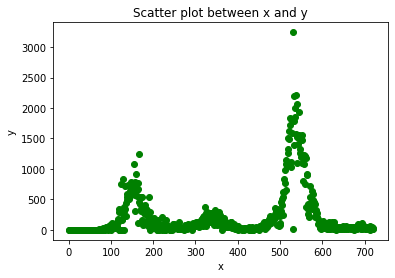

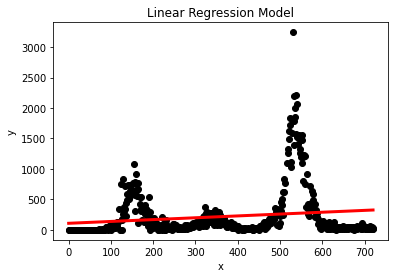

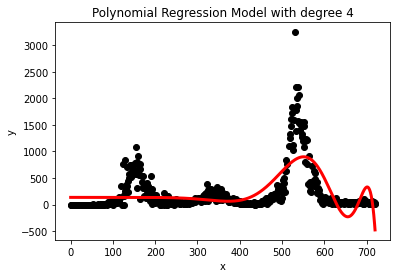

    degree  train_RMSE   test_RMSE
0        0  401.411318  370.195686
1        1  396.201800  361.361343
2        2  389.926406  362.188424
3        3  379.422890  352.243555
4        4  355.502488  317.259316
5        5  352.073024  317.823373
6        6  320.676471  295.045473
7        7  311.066312  286.521593
8        8  320.268131  288.685304
9        9  326.704531  294.157203
10      10  323.454169  294.914169
11      11  312.583966  289.815873
12      12  300.644624  281.064555
13      13  294.141893  272.250789
14      14  295.156006  267.906251
15      15  301.114103  270.206369
16      16  314.460314  293.441990
17      17  312.302794  287.303935
18      18  314.116433  284.145935
19      19  319.435812  284.809666
20      20  327.237057  289.181482
21      21  336.370085  296.432253
22      22  345.839455  305.425265
23      23  354.917469  315.068507
24      24  363.146646  324.507191
25      25  370.291799  333.174160


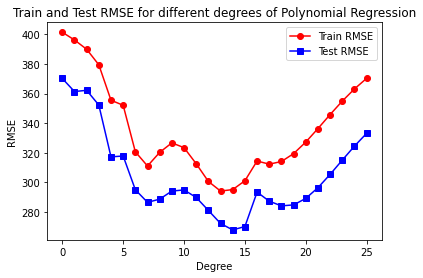

LinearRegression()

In [93]:

from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

pos1 = 0;
pos2 = 0
col_list = ['Date_reported', 'Country', 'New_cases']
dataset = pd.read_csv('WHO-COVID-19-global-data.csv', usecols=col_list)

xx = dataset.loc[dataset['Country'] == 'Afghanistan']
xx['Date_reported'] = xx['Date_reported'].astype('category').cat.codes

pos1 = dataset.columns.get_loc('Date_reported')
pos11 = pos1-1
pos2 = dataset.columns.get_loc('New_cases')

X = xx.iloc[:, pos1].values
X = X.reshape(-1, 1)

yy = dataset.loc[dataset['Country'] == 'Afghanistan']
y = yy.iloc[:, pos2 ].values


plt.plot(X, y, 'go')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot between x and y')
plt.show()
#---------------------------------------------
random_ind = np.random.choice(list(range(len(X))), size=len(X), replace=False)
xt = X[random_ind]
yt = y[random_ind]

x_train = xt[:int(0.8 * len(X))]
x_test = xt[int(0.8 * len(X)):]

y_train = yt[:int(0.8 * len(y))]
y_test = yt[int(0.8 * len(y)):]

x_train = x_train.reshape((-1, 1))
model = LinearRegression()
model.fit(x_train, y_train)

model_curve = model.predict(X)

plt.plot(x_train[:, 0], y_train, 'ko')
plt.plot(X[:, 0], model_curve, 'r-', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.show()

#--------------------------

features = PolynomialFeatures(degree=(3,15))
x_train_transformed = features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_transformed, y_train)

x_true_transformed = features.fit_transform(X)
model_curve = model.predict(x_true_transformed)

plt.plot(x_train[:, 0], y_train, 'ko')
plt.plot(X[:, 0], model_curve, 'r-', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Model with degree 4')
plt.show()
#--------------------------------------


def poly_reg(degrees, x_train, x_test, y_train, y_test, plot=False):
    features = PolynomialFeatures(degree=degrees)
    x_train_transformed = features.fit_transform(x_train)
    model = LinearRegression()
    model.fit(x_train_transformed, y_train)

    x_test_transformed = features.fit_transform(x_test)

    train_pred = model.predict(x_train_transformed)
    rmse_poly_train = mean_squared_error(y_train, train_pred, squared=False)

    test_pred = model.predict(x_test_transformed)
    rmse_poly = mean_squared_error(y_test, test_pred, squared=False)

    x_true_transformed = features.fit_transform(X)
    model_curve = model.predict(x_true_transformed)

    if plot == True:
        plt.plot(x_train[:, 0], y_train, 'ko')
        plt.plot(X[:, 0], model_curve, 'r-', linewidth=3)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Linear Regression Model')
        plt.show()

    return [rmse_poly_train, rmse_poly]


errors = []

for i in range(26):
    errors.append([i] + poly_reg(i, x_train, x_test, y_train, y_test))

df = pd.DataFrame(errors, columns=['degree', 'train_RMSE', 'test_RMSE'])

print(df)
#-------------------------------------------
plt.plot(df['degree'], df['train_RMSE'], 'o-r', label='Train RMSE')
plt.plot(df['degree'], df['test_RMSE'], 's-b', label='Test RMSE')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.title('Train and Test RMSE for different degrees of Polynomial Regression')
plt.show()
#-------------------------------
lin_reg = LinearRegression()
lin_reg.fit(X, y)
#------------------------------





